In [40]:
import numpy as np
from util import *
from dpilqr import plot_solve
import matplotlib.pyplot as plt
import os
import util

In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
from dpilqr import random_setup,pos_mask


## Load results from centralized simulation:

In [65]:
n_agents = 3
n_states = 6
x_dims = [n_states]*n_agents

In [66]:
data = np.load('3_drones_centralized_sim_data.npy')

In [67]:
data.shape

(31, 18)

In [68]:
x0,xf = util.paper_setup_3_quads()

In [69]:
x0.T

array([[0.5, 1.5, 1. , 0. , 0. , 0. , 2.5, 1.5, 1. , 0. , 0. , 0. , 1.5,
        1.3, 1. , 0. , 0. , 0. ]])

In [70]:
xf.T

array([[2.5, 1.5, 1. , 0. , 0. , 0. , 0.5, 1.5, 1. , 0. , 0. , 0. , 1.5,
        2.2, 1. , 0. , 0. , 0. ]])

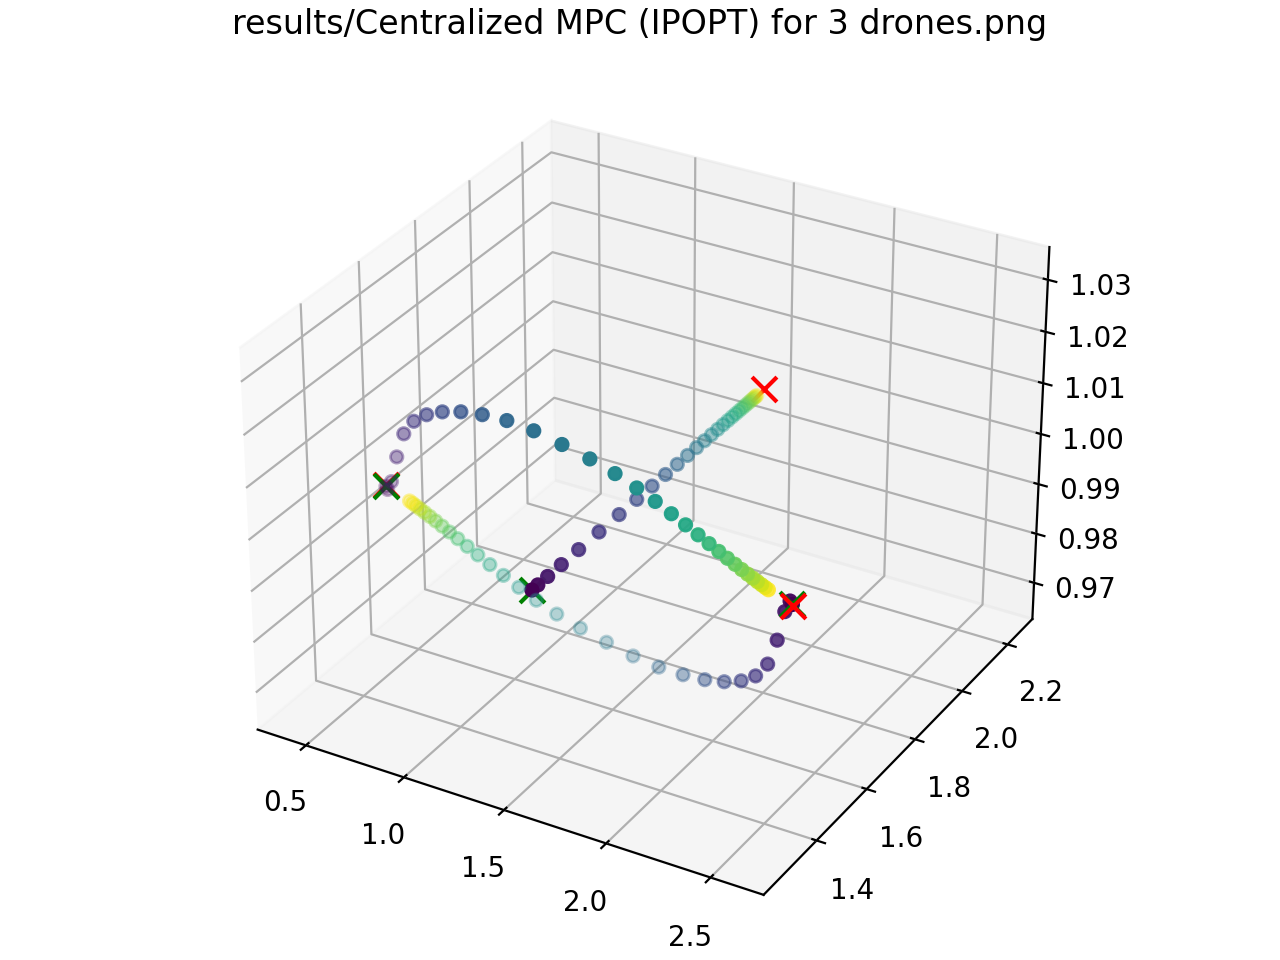

In [73]:
%matplotlib ipympl
plt.figure(dpi=200)
plot_solve(data,0,xf,x_dims,n_d=3)
plt.title('results/Centralized MPC (IPOPT) for 3 drones.png');

In [5]:
n_agents = 10
n_states = 6
x_dims = [n_states]*n_agents

In [6]:
data = np.load('simulation_data/10_drones_distributed_sim_data.npy')

In [7]:
x0,xf = util.paper_setup_10_quads()

In [8]:
plot_solve?

Signature: plot_solve(X, J, x_goal, x_dims=None, color_agents=False, n_d=2)
Docstring: Plot the resultant trajectory on plt.gcf()
File:      /mnt/c/Users/Randy666/Documents/projects/ICON_lab/decentralized/decentralized/util.py
Type:      function


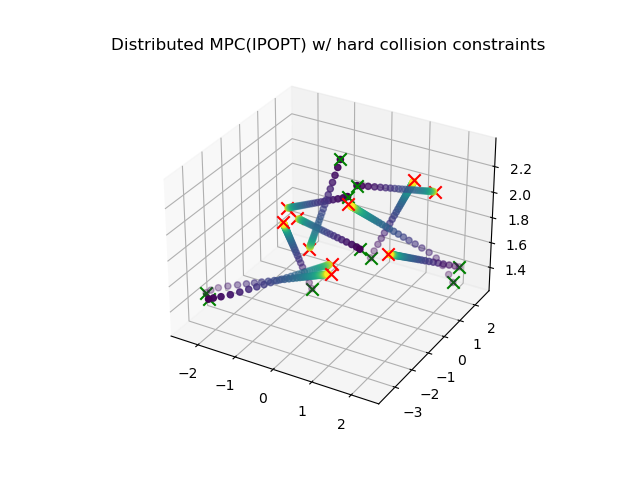

In [9]:
%matplotlib ipympl
plt.figure(dpi=100)
plot_solve(data,56.80,xf,x_dims,n_d=3)
plt.title('Distributed MPC(IPOPT) w/ hard collision constraints');

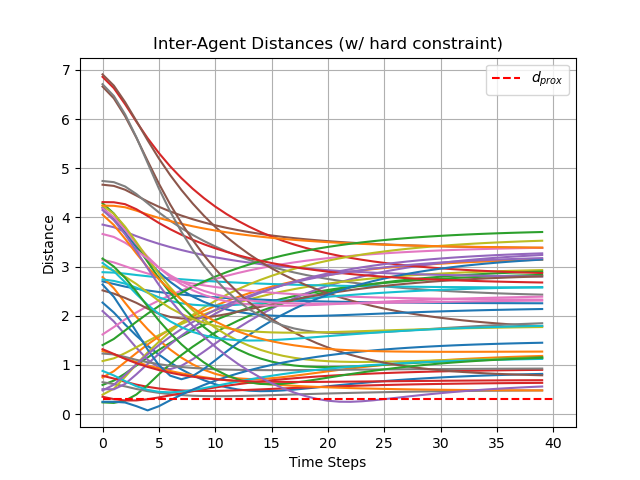

In [10]:
plt.figure()
plt.plot(compute_pairwise_distance(data,x_dims));
plt.hlines(0.3, 0, data.shape[0], 'r', ls='--', label="$d_{prox}$")
plt.title("Inter-Agent Distances (w/ hard constraint)")
plt.xlabel("Time Steps")
plt.ylabel("Distance")
plt.legend()
plt.grid()
plt.draw()

### Distributed MPC with collision costs instead of constraints:

In [11]:
data_soft = np.load('10_drones_distributed_sim_data(soft_constraint).npy')

In [12]:
# n_agents = 10
# n_states = 6
# x_dims = [n_states]*n_agents


In [13]:
data_soft.shape

(31, 60)

In [14]:
x0,xf = paper_setup_10_quads()

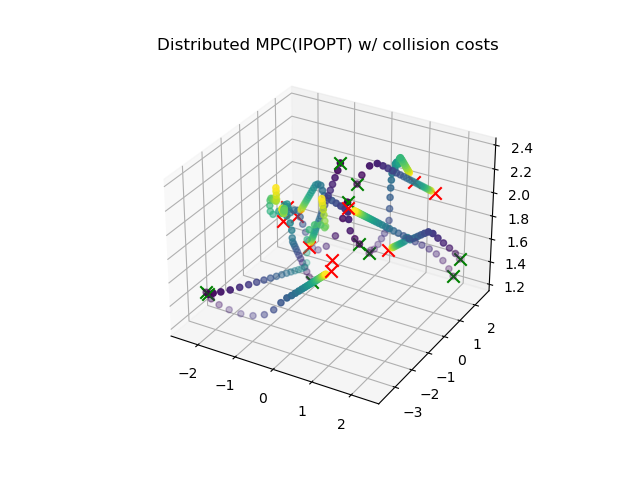

In [15]:
%matplotlib ipympl
plt.figure(dpi=100)
plot_solve(data_soft,2606.853,xf,x_dims=[6,6,6,6,6,6,6,6,6,6],n_d=3);
plt.title('Distributed MPC(IPOPT) w/ collision costs');

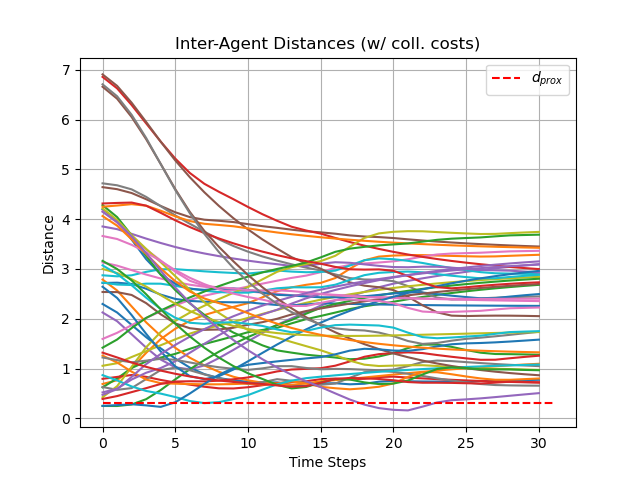

In [16]:
plt.figure()
plt.plot(compute_pairwise_distance(data_soft,x_dims));
plt.hlines(0.3, 0, data_soft.shape[0], 'r', ls='--', label="$d_{prox}$")
plt.title("Inter-Agent Distances (w/ coll. costs)")
plt.xlabel("Time Steps")
plt.ylabel("Distance")
plt.legend()
plt.grid()
plt.draw()